In [1]:
import pickle
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, AdamW
from transformers.optimization import get_constant_schedule_with_warmup
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import matplotlib.pyplot as plt
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print("DONE!!!")

DONE!!!


In [2]:
print("Datasets......\n1. SNLI \n2. MULTI-NLI\n3. SICK")
for i in range(3):
    dataset_choice = int(input("Enter choice :"))
    if dataset_choice == 1:
        dataset = load_dataset("snli")
        break
    elif dataset_choice == 2:
        dataset = load_dataset("multi_nli")
        break
    elif dataset_choice == 3:
        dataset =  load_dataset("sick")
        break
else:
    print("Invalid Choices Thrice....\nRun the program again")
    exit()

Datasets......
1. SNLI 
2. MULTI-NLI
3. SICK


Enter choice : 3


Generating train split:   0%|          | 0/4439 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/495 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4906 [00:00<?, ? examples/s]

In [3]:
class NLIDataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = self.data.iloc[idx]
        return {
            'premise': item['premise'],
            'hypothesis': item['hypothesis'],
            'label': item['label']
        }

print("DONE!!!")

DONE!!!


In [4]:
print(dataset_choice, end = "-")

if dataset_choice == 1:
    print("SNLI")
    dataset['train'] = dataset['train'].filter(lambda sen: sen['label'] != -1)
    dataset['validation'] = dataset['validation'].filter(lambda sen: sen['label'] != -1)
    dataset['test'] = dataset['test'].filter(lambda sen: sen['label'] != -1)
    train_data = dataset['train']
    test_data = dataset['test']
    validation_data = dataset['validation']

    train_dataset = pd.DataFrame({
        'sNo': range(len(train_data)),
        'premise': train_data['premise'],
        'hypothesis': train_data['hypothesis'],
        'label': train_data['label']
    })

    val_dataset = pd.DataFrame({
        'sNo': range(len(validation_data)),
        'premise': validation_data['premise'],
        'hypothesis': validation_data['hypothesis'],
        'label': validation_data['label']
    })

    test_dataset = pd.DataFrame({
        'sNo': range(len(test_data)), 
        'premise': test_data['premise'],
        'hypothesis': test_data['hypothesis'],
        'label': test_data['label']
    })
    
elif dataset_choice == 2:
    print("MULTI-NLI")
    train_data = dataset['train']
    validation_data = dataset['validation_matched']
    test_data = dataset['validation_mismatched']

    train_dataset = pd.DataFrame({
        'sNo': range(len(train_data)),
        'premise': train_data['premise'],
        'hypothesis': train_data['hypothesis'],
        'label': train_data['label']
    })

    val_dataset = pd.DataFrame({
        'sNo': range(len(validation_data)),  
        'premise': validation_data['premise'],
        'hypothesis': validation_data['hypothesis'],
        'label': validation_data['label']
    })

    test_dataset = pd.DataFrame({
        'sNo': range(len(test_data)),  
        'premise': test_data['premise'],
        'hypothesis': test_data['hypothesis'],
        'label': test_data['label']
    })
    
elif dataset_choice == 3:
    print("SICK")
    train_data = dataset['train']
    validation_data = dataset['validation']
    test_data = dataset['test']

    train_dataset = pd.DataFrame({
        'sNo': range(len(train_data)),
        'premise': train_data['sentence_A'],
        'hypothesis': train_data['sentence_B'],
        'label': train_data['label']
    })

    val_dataset = pd.DataFrame({
        'sNo': range(len(validation_data)),
        'premise': validation_data['sentence_A'],
        'hypothesis': validation_data['sentence_B'],
        'label': validation_data['label']
    })

    test_dataset = pd.DataFrame({
        'sNo': range(len(test_data)), 
        'premise': test_data['sentence_A'],
        'hypothesis': test_data['sentence_B'],
        'label': test_data['label']
    })

print("DONE!!!")

3-SICK
DONE!!!


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model1 = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
optimizer = AdamW(model1.parameters(), lr=1e-5)

print(dataset_choice)
# Datasets......
train_ds = NLIDataset(train_dataset)
val_ds = NLIDataset(val_dataset)
test_ds = NLIDataset(test_dataset)

# DataLoaders......
batch_size = 32
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size)
test_loader = DataLoader(test_ds, batch_size=batch_size)
print(len(train_loader), len(val_loader), len(test_loader))
print("DONE!!!")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


3
139 16 154
DONE!!!


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [6]:
train_ds[1]

{'premise': 'A group of children is playing in the house and there is no man standing in the background',
 'hypothesis': 'A group of kids is playing in a yard and an old man is standing in the background',
 'label': 1}

# **BERT**

In [7]:
from collections import Counter

label_counts = Counter(train_dataset['label'])

print("Count of unique labels:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} samples")

Count of unique labels:
Label 1: 2524 samples
Label 0: 1274 samples
Label 2: 641 samples


In [8]:
print("Train Dataset Size:", len(train_dataset), len(train_ds))
print("Val Dataset Size:", len(val_dataset), len(val_ds))
print("Test Dataset Size:", len(test_dataset), len(test_ds))

print("Train DataLoader Size:", len(train_loader))
print("Val DataLoader Size:", len(val_loader))
print("Test DataLoader Size:", len(test_loader))

Train Dataset Size: 4439 4439
Val Dataset Size: 495 495
Test Dataset Size: 4906 4906
Train DataLoader Size: 139
Val DataLoader Size: 16
Test DataLoader Size: 154


In [9]:
epochs = 3

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model1.to(device)
all_preds1 = []

for epoch in range(epochs): 
    print(epoch + 1, "Epoch.......")
    correct_predictions = 0
    total_predictions = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):  
        optimizer.zero_grad()
        inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt")
        inputs = {key: tensor.to(device) for key, tensor in inputs.items()}  
        labels = batch['label'].to(device)
        
        outputs = model1(**inputs)
        logits = outputs.logits
        
        loss = F.cross_entropy(logits, labels)
        loss.backward()
        optimizer.step()
        
        predicted_labels = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)
    
    train_accuracy = correct_predictions / total_predictions
    print("Train Accuracy:", train_accuracy)
    
    # Validation...
    model1.eval()
    val_labels = []
    val_preds = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt")
            inputs = {key: tensor.to(device) for key, tensor in inputs.items()}
            labels = batch['label'].to(device)
            outputs = model1(**inputs)
            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    print("Validation Accuracy:", val_accuracy)
    
    test_labels = []
    test_preds2 = []
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):  
            inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt")
            inputs = {key: tensor.to(device) for key, tensor in inputs.items()}  
            labels = batch['label'].to(device)
            outputs = model1(**inputs)
            test_labels.extend(labels.cpu().numpy())
            test_preds2.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

    test_accuracy = accuracy_score(test_labels, test_preds2)
    all_preds1.append(test_preds2)
    print("Bert Test Accuracy:", test_accuracy)
    print()

cuda
1 Epoch.......


Epoch 1: 100%|██████████| 139/139 [00:22<00:00,  6.12it/s]


Train Accuracy: 0.7096192836224375


Validation: 100%|██████████| 16/16 [00:01<00:00, 15.55it/s]


Validation Accuracy: 0.795959595959596


Testing: 100%|██████████| 154/154 [00:09<00:00, 16.40it/s]


Bert Test Accuracy: 0.7980024459845088

2 Epoch.......


Epoch 2: 100%|██████████| 139/139 [00:22<00:00,  6.27it/s]


Train Accuracy: 0.8616805586843884


Validation: 100%|██████████| 16/16 [00:01<00:00, 15.84it/s]


Validation Accuracy: 0.8383838383838383


Testing: 100%|██████████| 154/154 [00:09<00:00, 16.50it/s]


Bert Test Accuracy: 0.8432531593966571

3 Epoch.......


Epoch 3: 100%|██████████| 139/139 [00:22<00:00,  6.31it/s]


Train Accuracy: 0.9173237215589096


Validation: 100%|██████████| 16/16 [00:01<00:00, 15.82it/s]


Validation Accuracy: 0.8404040404040404


Testing: 100%|██████████| 154/154 [00:09<00:00, 16.54it/s]

Bert Test Accuracy: 0.8469221361598043



In [11]:
# Testing.......
test_labels = []
test_preds1 = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):  
        inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt")
        inputs = {key: tensor.to(device) for key, tensor in inputs.items()}  
        labels = batch['label'].to(device)
        outputs = model1(**inputs)
        test_labels.extend(labels.cpu().numpy())
        test_preds1.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds1)
print("BERT Base Test Accuracy:", test_accuracy)

Testing: 100%|██████████| 154/154 [00:09<00:00, 16.44it/s]

BERT Base Test Accuracy: 0.8469221361598043


In [12]:
combined_preds = np.vstack(all_preds1)
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_accuracy = accuracy_score(test_labels, majority_vote)
print("BERT Avg Test Accuracy:", test_accuracy)

BERT Avg Test Accuracy: 0.8412148389726865


# **RoBERTa**

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
from datasets import load_dataset
from sklearn.metrics import accuracy_score

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model2 = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

optimizer = AdamW(model2.parameters(), lr=1e-5)
all_preds2 = []

for epoch in range(epochs): 
    print(epoch + 1, "Epoch.......")
    correct_predictions = 0
    total_predictions = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):  
        optimizer.zero_grad()
        inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt").to(device)
        labels = batch['label'].to(device)
        
        outputs = model2(**inputs)
        logits = outputs.logits
        
        loss = F.cross_entropy(logits, labels)
        loss.backward()
        optimizer.step()
        
        predicted_labels = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)
    
    train_accuracy = correct_predictions / total_predictions
    print("Train Accuracy:", train_accuracy)
    
    # Validation
    model2.eval()
    val_labels = []
    val_preds = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt").to(device)
            labels = batch['label'].to(device)
            outputs = model2(**inputs)
            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    print("Validation Accuracy:", val_accuracy)
    
    test_labels = []
    test_preds2 = []
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):  
            inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt")
            inputs = {key: tensor.to(device) for key, tensor in inputs.items()}  
            labels = batch['label'].to(device)
            outputs = model2(**inputs)
            test_labels.extend(labels.cpu().numpy())
            test_preds2.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

    test_accuracy = accuracy_score(test_labels, test_preds2)
    all_preds2.append(test_preds2)
    print("Roberta Test Accuracy:", test_accuracy)
    print()

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


1 Epoch.......


Epoch 1: 100%|██████████| 139/139 [00:20<00:00,  6.78it/s]


Train Accuracy: 0.7377787790042802


Validation: 100%|██████████| 16/16 [00:00<00:00, 20.54it/s]


Validation Accuracy: 0.8747474747474747


Testing: 100%|██████████| 154/154 [00:07<00:00, 21.89it/s]


Roberta Test Accuracy: 0.8764777823073787

2 Epoch.......


Epoch 2: 100%|██████████| 139/139 [00:20<00:00,  6.78it/s]


Train Accuracy: 0.9105654426672674


Validation: 100%|██████████| 16/16 [00:00<00:00, 20.72it/s]


Validation Accuracy: 0.8888888888888888


Testing: 100%|██████████| 154/154 [00:07<00:00, 21.95it/s]


Roberta Test Accuracy: 0.8913575214023645

3 Epoch.......


Epoch 3: 100%|██████████| 139/139 [00:20<00:00,  6.80it/s]


Train Accuracy: 0.9506645640910115


Validation: 100%|██████████| 16/16 [00:00<00:00, 20.57it/s]


Validation Accuracy: 0.8848484848484849


Testing: 100%|██████████| 154/154 [00:07<00:00, 21.93it/s]

Roberta Test Accuracy: 0.8844272319608643



In [14]:
# Testing.......
test_labels = []
test_preds2 = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):  
        inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt")
        inputs = {key: tensor.to(device) for key, tensor in inputs.items()}  
        labels = batch['label'].to(device)
        outputs = model2(**inputs)
        test_labels.extend(labels.cpu().numpy())
        test_preds2.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds2)
print("Roberta Test Accuracy:", test_accuracy)

Testing: 100%|██████████| 154/154 [00:07<00:00, 21.98it/s]

Roberta Test Accuracy: 0.8844272319608643


In [15]:
combined_preds = np.vstack(all_preds2)
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_accuracy = accuracy_score(test_labels, majority_vote)
print("Roberta Avg Test Accuracy:", test_accuracy)

Roberta Avg Test Accuracy: 0.8935996738687322


# **ALBERT**

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AlbertTokenizer, AlbertForSequenceClassification, AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
from datasets import load_dataset
from sklearn.metrics import accuracy_score

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model3 = AlbertForSequenceClassification.from_pretrained("albert-base-v2", num_labels=3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model3.to(device)

optimizer = AdamW(model3.parameters(), lr=1e-5)
all_preds3 = []

for epoch in range(epochs): 
    print(epoch + 1, "Epoch.......")
    correct_predictions = 0
    total_predictions = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):  
        optimizer.zero_grad()
        inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt").to(device)
        labels = batch['label'].to(device)
        
        outputs = model3(**inputs)
        logits = outputs.logits
        
        loss = F.cross_entropy(logits, labels)
        loss.backward()
        optimizer.step()
        
        predicted_labels = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)
    
    train_accuracy = correct_predictions / total_predictions
    print("Train Accuracy:", train_accuracy)
    
    # Validation
    model3.eval()
    val_labels = []
    val_preds = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt").to(device)
            labels = batch['label'].to(device)
            outputs = model3(**inputs)
            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    print("Validation Accuracy:", val_accuracy)
    
    test_labels = []
    test_preds2 = []
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):  
            inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt")
            inputs = {key: tensor.to(device) for key, tensor in inputs.items()}  
            labels = batch['label'].to(device)
            outputs = model3(**inputs)
            test_labels.extend(labels.cpu().numpy())
            test_preds2.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

    test_accuracy = accuracy_score(test_labels, test_preds2)
    all_preds3.append(test_preds2)
    print("Alberta Test Accuracy:", test_accuracy)
    print()

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


1 Epoch.......


Epoch 1: 100%|██████████| 139/139 [00:20<00:00,  6.67it/s]


Train Accuracy: 0.7652624464969587


Validation: 100%|██████████| 16/16 [00:00<00:00, 17.59it/s]


Validation Accuracy: 0.8505050505050505


Testing: 100%|██████████| 154/154 [00:08<00:00, 18.84it/s]


Alberta Test Accuracy: 0.8668976763147167

2 Epoch.......


Epoch 2: 100%|██████████| 139/139 [00:20<00:00,  6.69it/s]


Train Accuracy: 0.8837576030637531


Validation: 100%|██████████| 16/16 [00:00<00:00, 17.62it/s]


Validation Accuracy: 0.8868686868686869


Testing: 100%|██████████| 154/154 [00:08<00:00, 18.89it/s]


Alberta Test Accuracy: 0.8854463921728496

3 Epoch.......


Epoch 3: 100%|██████████| 139/139 [00:20<00:00,  6.75it/s]


Train Accuracy: 0.9202523090786213


Validation: 100%|██████████| 16/16 [00:00<00:00, 17.48it/s]


Validation Accuracy: 0.8626262626262626


Testing: 100%|██████████| 154/154 [00:08<00:00, 18.84it/s]

Alberta Test Accuracy: 0.8691398287810844



In [17]:
# Testing.......
test_labels = []
test_preds3 = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):  
        inputs = tokenizer(batch['premise'], batch['hypothesis'], padding=True, truncation=True, return_tensors="pt")
        inputs = {key: tensor.to(device) for key, tensor in inputs.items()}  
        labels = batch['label'].to(device)
        outputs = model3(**inputs)
        test_labels.extend(labels.cpu().numpy())
        test_preds3.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds3)
print("Alberta Test Accuracy:", test_accuracy)

Testing: 100%|██████████| 154/154 [00:08<00:00, 18.78it/s]

Alberta Test Accuracy: 0.8691398287810844


In [18]:
combined_preds = np.vstack(all_preds3)
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_accuracy = accuracy_score(test_labels, majority_vote)
print("Alberta Avg Test Accuracy:", test_accuracy)

Alberta Avg Test Accuracy: 0.8856502242152466


# **Results**

In [19]:
print("Bert + Roberta + Alberta")
combined_preds = np.vstack([all_preds1[:-1], all_preds2[:-1], all_preds3[:-1]])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble Test Accuracy :", test_accuracy)

combined_preds = np.vstack([all_preds1, all_preds2, all_preds3])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble + Average Test Accuracy :", test_accuracy)

Bert + Roberta + Alberta
Ensemble Test Accuracy : 0.8844272319608643
Ensemble + Average Test Accuracy : 0.8885038728088055


In [20]:
print("Roberta + Alberta")
combined_preds = np.vstack([all_preds2[:-1], all_preds3[:-1]])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble Test Accuracy :", test_accuracy)

combined_preds = np.vstack([all_preds2, all_preds3])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble + Average Test Accuracy :", test_accuracy)

Roberta + Alberta
Ensemble Test Accuracy : 0.8929881777415409
Ensemble + Average Test Accuracy : 0.8956379942927029


In [21]:
print("Bert + Roberta")
combined_preds = np.vstack([all_preds1[:-1], all_preds2[:-1]])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble Test Accuracy :", test_accuracy)

combined_preds = np.vstack([all_preds1, all_preds2])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble + Average Test Accuracy :", test_accuracy)

Bert + Roberta
Ensemble Test Accuracy : 0.8613942111699959
Ensemble + Average Test Accuracy : 0.8689359967386873


In [22]:
print("Bert + Alberta")
combined_preds = np.vstack([all_preds1[:-1], all_preds3[:-1]])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble Test Accuracy :", test_accuracy)

combined_preds = np.vstack([all_preds1, all_preds3])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble + Average Test Accuracy :", test_accuracy)

Bert + Alberta
Ensemble Test Accuracy : 0.8558907460252752
Ensemble + Average Test Accuracy : 0.8636363636363636


# **Ensemble**

Bert + Roberta + Alberta
Ensemble Test Accuracy : 88.44%
Ensemble F1 Score : 88.45%
Ensemble Recall Score : 88.44%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1404
           1       0.90      0.91      0.90      2790
           2       0.94      0.83      0.88       712

    accuracy                           0.88      4906
   macro avg       0.89      0.87      0.88      4906
weighted avg       0.89      0.88      0.88      4906



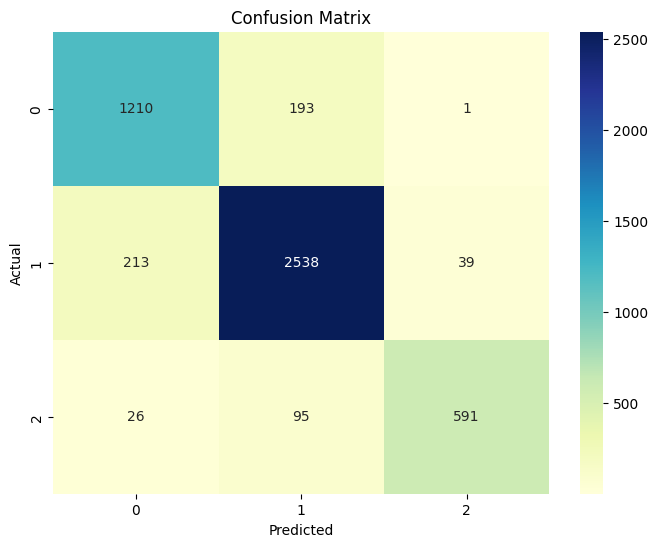

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

print("Bert + Roberta + Alberta")
combined_preds = np.vstack([all_preds1[:-1], all_preds2[:-1], all_preds3[:-1]])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

# Accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble Test Accuracy : {:.2f}%".format(test_accuracy * 100))

# F1 Score
f1 = f1_score(test_labels, test_preds, average='weighted')
print("Ensemble F1 Score : {:.2f}%".format(f1 * 100))

# Recall
recall = recall_score(test_labels, test_preds, average='weighted')
print("Ensemble Recall Score : {:.2f}%".format(recall * 100))

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_preds))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Roberta + Alberta
Ensemble Test Accuracy : 89.30%
Ensemble F1 Score : 89.27%
Ensemble Recall Score : 89.30%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1404
           1       0.90      0.93      0.91      2790
           2       0.95      0.82      0.88       712

    accuracy                           0.89      4906
   macro avg       0.90      0.87      0.88      4906
weighted avg       0.89      0.89      0.89      4906



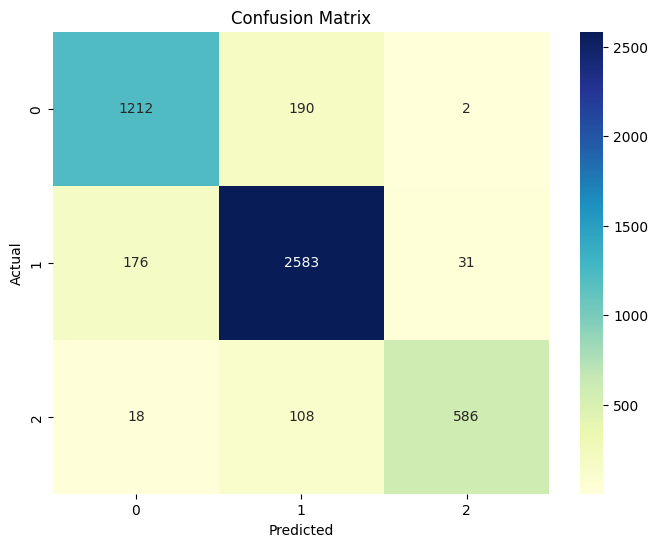

In [25]:
print("Roberta + Alberta")
combined_preds = np.vstack([all_preds2[:-1], all_preds3[:-1]])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

# Accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble Test Accuracy : {:.2f}%".format(test_accuracy * 100))

# F1 Score
f1 = f1_score(test_labels, test_preds, average='weighted')
print("Ensemble F1 Score : {:.2f}%".format(f1 * 100))

# Recall
recall = recall_score(test_labels, test_preds, average='weighted')
print("Ensemble Recall Score : {:.2f}%".format(recall * 100))

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_preds))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Bert + Roberta
Ensemble Test Accuracy : 86.14%
Ensemble F1 Score : 86.28%
Ensemble Recall Score : 86.14%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1404
           1       0.91      0.86      0.88      2790
           2       0.92      0.83      0.87       712

    accuracy                           0.86      4906
   macro avg       0.86      0.86      0.86      4906
weighted avg       0.87      0.86      0.86      4906



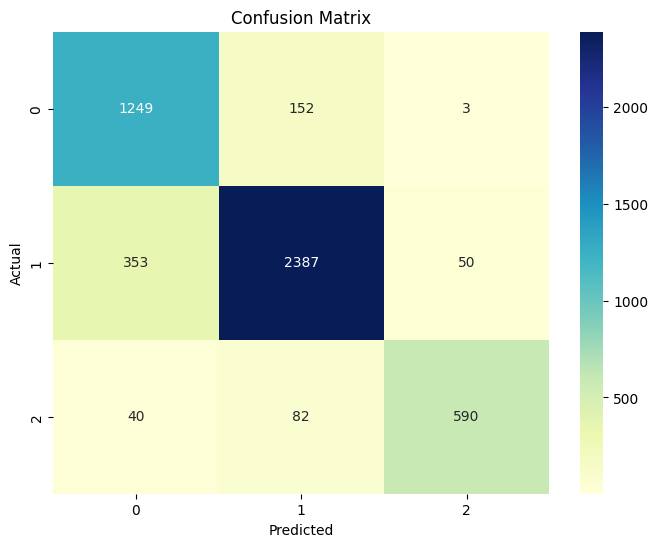

In [26]:
print("Bert + Roberta")
combined_preds = np.vstack([all_preds1[:-1], all_preds2[:-1]])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

# Accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble Test Accuracy : {:.2f}%".format(test_accuracy * 100))

# F1 Score
f1 = f1_score(test_labels, test_preds, average='weighted')
print("Ensemble F1 Score : {:.2f}%".format(f1 * 100))

# Recall
recall = recall_score(test_labels, test_preds, average='weighted')
print("Ensemble Recall Score : {:.2f}%".format(recall * 100))

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_preds))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Bert + Alberta
Ensemble Test Accuracy : 85.59%
Ensemble F1 Score : 85.73%
Ensemble Recall Score : 85.59%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      1404
           1       0.89      0.86      0.88      2790
           2       0.94      0.82      0.88       712

    accuracy                           0.86      4906
   macro avg       0.86      0.85      0.85      4906
weighted avg       0.86      0.86      0.86      4906



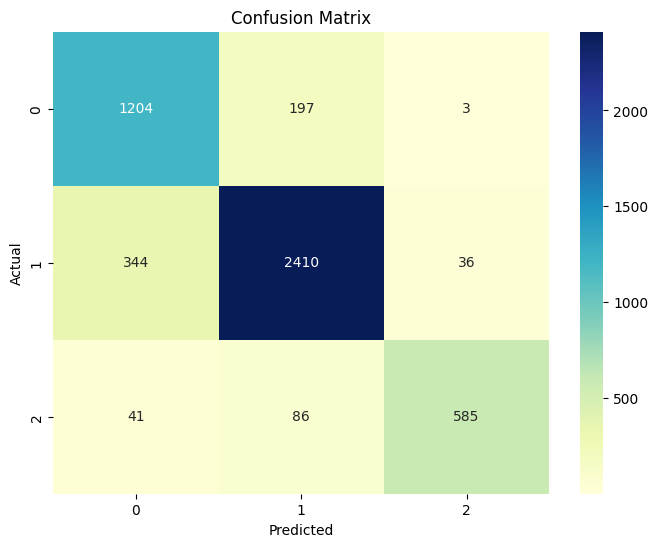

In [27]:
print("Bert + Alberta")
combined_preds = np.vstack([all_preds1[:-1], all_preds3[:-1]])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

# Accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble Test Accuracy : {:.2f}%".format(test_accuracy * 100))

# F1 Score
f1 = f1_score(test_labels, test_preds, average='weighted')
print("Ensemble F1 Score : {:.2f}%".format(f1 * 100))

# Recall
recall = recall_score(test_labels, test_preds, average='weighted')
print("Ensemble Recall Score : {:.2f}%".format(recall * 100))

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_preds))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Ensemble + Avg**

Bert + Roberta + Alberta
Ensemble + Average Test Accuracy : 88.85%
Ensemble + Average F1 Score : 88.86%
Ensemble + Average Recall Score : 88.85%


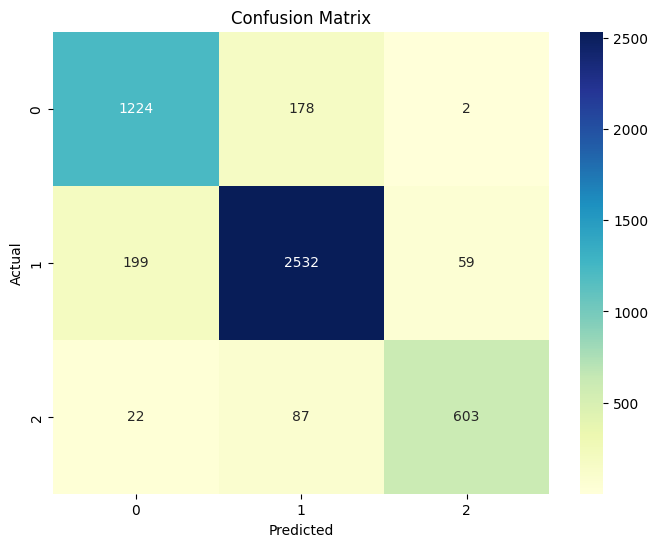

In [28]:
print("Bert + Roberta + Alberta")
combined_preds = np.vstack([all_preds1, all_preds2, all_preds3])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

# Accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble + Average Test Accuracy : {:.2f}%".format(test_accuracy * 100))

# F1 Score
f1 = f1_score(test_labels, test_preds, average='weighted')
print("Ensemble + Average F1 Score : {:.2f}%".format(f1 * 100))

# Recall
recall = recall_score(test_labels, test_preds, average='weighted')
print("Ensemble + Average Recall Score : {:.2f}%".format(recall * 100))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Roberta + Alberta
Ensemble + Average Test Accuracy : 89.56%
Ensemble + Average F1 Score : 89.58%
Ensemble + Average Recall Score : 89.56%


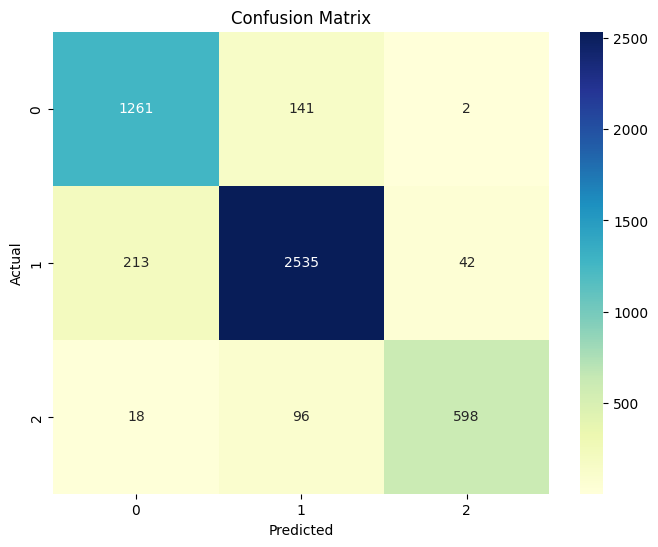

In [29]:
print("Roberta + Alberta")
combined_preds = np.vstack([all_preds2, all_preds3])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

# Accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble + Average Test Accuracy : {:.2f}%".format(test_accuracy * 100))

# F1 Score
f1 = f1_score(test_labels, test_preds, average='weighted')
print("Ensemble + Average F1 Score : {:.2f}%".format(f1 * 100))

# Recall
recall = recall_score(test_labels, test_preds, average='weighted')
print("Ensemble + Average Recall Score : {:.2f}%".format(recall * 100))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Bert + Roberta
Ensemble + Average Test Accuracy : 86.89%
Ensemble + Average F1 Score : 86.99%
Ensemble + Average Recall Score : 86.89%


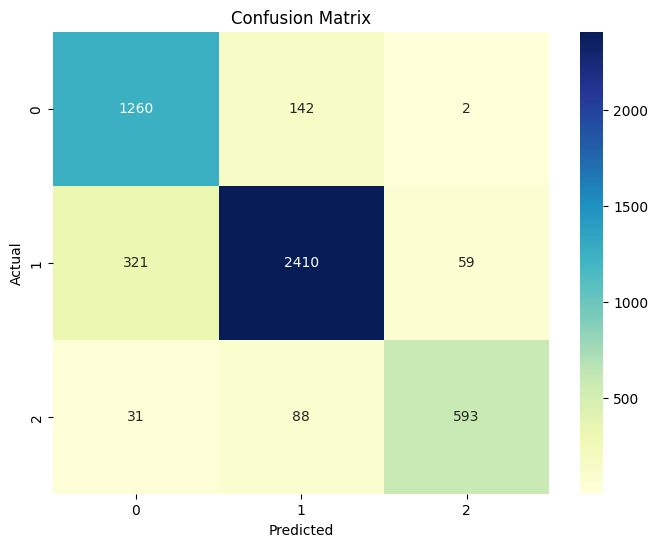

In [30]:
print("Bert + Roberta")
combined_preds = np.vstack([all_preds1, all_preds2])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

# Accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble + Average Test Accuracy : {:.2f}%".format(test_accuracy * 100))

# F1 Score
f1 = f1_score(test_labels, test_preds, average='weighted')
print("Ensemble + Average F1 Score : {:.2f}%".format(f1 * 100))

# Recall
recall = recall_score(test_labels, test_preds, average='weighted')
print("Ensemble + Average Recall Score : {:.2f}%".format(recall * 100))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Bert + Alberta
Ensemble + Average Test Accuracy : 86.36%
Ensemble + Average F1 Score : 86.46%
Ensemble + Average Recall Score : 86.36%


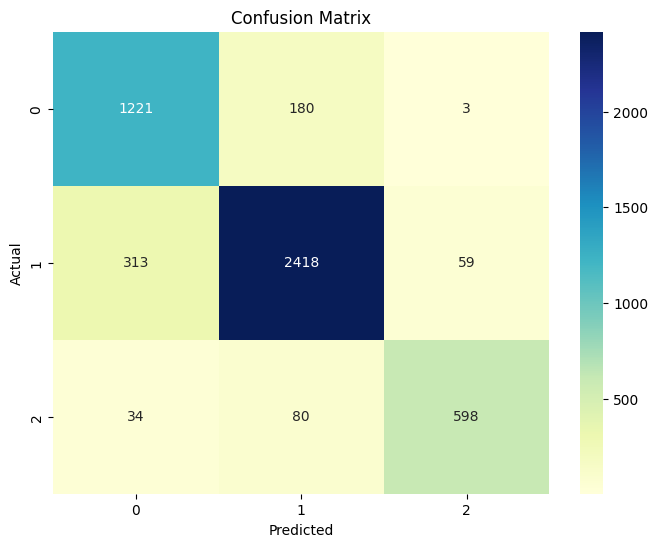

In [31]:
print("Bert + Alberta")
combined_preds = np.vstack([all_preds1, all_preds3])
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=combined_preds)
test_preds = majority_vote.tolist()

# Accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print("Ensemble + Average Test Accuracy : {:.2f}%".format(test_accuracy * 100))

# F1 Score
f1 = f1_score(test_labels, test_preds, average='weighted')
print("Ensemble + Average F1 Score : {:.2f}%".format(f1 * 100))

# Recall
recall = recall_score(test_labels, test_preds, average='weighted')
print("Ensemble + Average Recall Score : {:.2f}%".format(recall * 100))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
torch.save(model1, "BERT.pth")
torch.save(model2, "ROBERTA.pth")
torch.save(model3, "ALBERTA.pth")

In [ ]:
torch.save(model1, "BERT_final.pth")
torch.save(model2, "ROBERTA_final.pth")
torch.save(model3, "ALBERTA_final.pth")

In [ ]:
torch.save(model1.state_dict(), 'model1_state_dict.pth')